# Завдання
* Згенерувати дані для тестування роботи
* Напишість клас простого автоенкодера
* Підготуйте дані для обробки енкодером
* Натренуйте енкодер
* Відновіть дані за допомогою навченного енкодера

# Виконання

### 1) Генерація даних

data_x = (1000,)
data_y = (1000,)


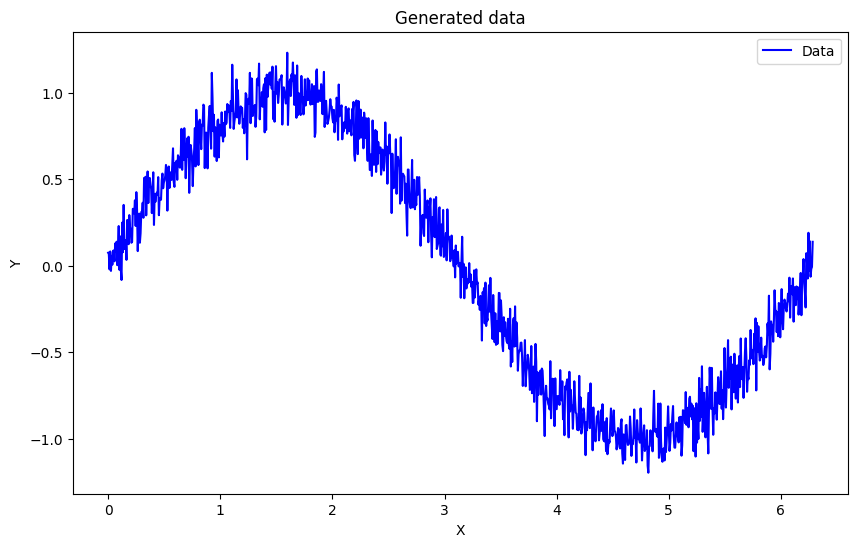

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

data_length = 1000

data_x = np.linspace(0, 2 * np.pi, data_length)
data_y = np.sin(data_x) + 0.1 * np.random.randn(data_length)

print(f'data_x = {data_x.shape}')
print(f'data_y = {data_y.shape}')

plt.figure(figsize=(10, 6))
plt.plot(data_x, data_y, label='Data', color='blue')
plt.title("Generated data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### 2) Створення класу просто автоенкодеру

In [41]:
import torch.nn as nn

class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

        self.decoder = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


### 3) Підготовка даних

In [42]:
from torch.utils.data import DataLoader, TensorDataset

train_test_ratio = 0.2

split_index = int(data_length * (1 - train_test_ratio))
print(f'train_test_ratio = {train_test_ratio}, split_index = {split_index}')

x_train = data_x[:split_index]
x_test = data_x[split_index:]

data_tensor = torch.tensor(data_y, dtype=torch.float32).unsqueeze(1) 

data_tensor_train = data_tensor[:split_index]
data_tensor_test = data_tensor[split_index:]

train_loader = DataLoader(TensorDataset(data_tensor_train, data_tensor_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(data_tensor_test, data_tensor_test), batch_size=32, shuffle=False)

train_test_ratio = 0.2, split_index = 800


### 4) Тренування енкодеру

In [43]:
import torch.optim as optim

# Hyperparameters
learningRate = 0.001
epochs = 1000

autoencoder = SimpleAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr = learningRate)

for epoch in range(epochs):
    for batch_features, _ in train_loader:
        outputs = autoencoder(batch_features)
        loss = criterion(outputs, batch_features)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

autoencoder.eval()
print('Learning is finished!')

Epoch [100/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Learning is finished!


### 5) Відновлення даних

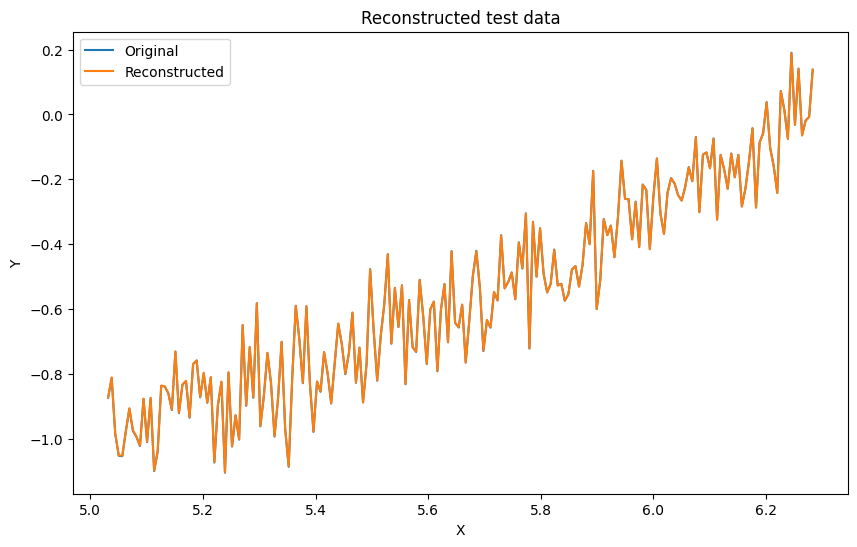

In [48]:
test_inputs = []
test_outputs = []

with torch.no_grad():
    for batch_features, _ in test_loader:
        outputs = autoencoder(batch_features)

        test_inputs.append(batch_features)
        test_outputs.append(outputs)

all_inputs = torch.cat(test_inputs, dim=0)
all_outputs = torch.cat(test_outputs, dim=0)

test_inputs_np = all_inputs.squeeze().numpy()
test_outputs_np = all_outputs.squeeze().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_test, test_inputs_np, label='Original')
plt.plot(x_test, test_outputs_np, label='Reconstructed')
plt.title("Reconstructed test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

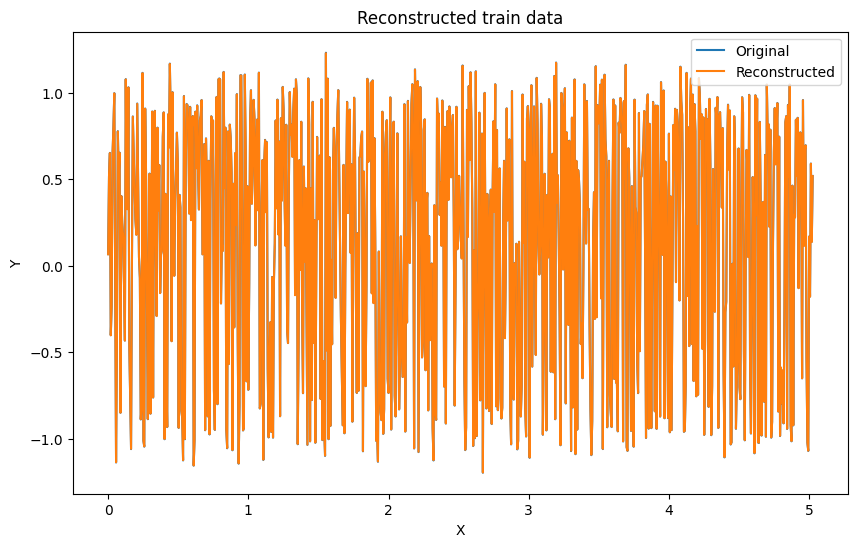

In [53]:
train_inputs = []
train_outputs = []

with torch.no_grad():
    for batch_features, _ in train_loader:
        outputs = autoencoder(batch_features)

        train_inputs.append(batch_features)
        train_outputs.append(outputs)

all_inputs = torch.cat(train_inputs, dim=0)
all_outputs = torch.cat(train_outputs, dim=0)

train_inputs_np = all_inputs.squeeze().numpy()
train_outputs_np = all_outputs.squeeze().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_train, train_inputs_np, label='Original')
plt.plot(x_train, train_outputs_np, label='Reconstructed')
plt.title("Reconstructed train data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()